In [ ]:


#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import time




In [2]:
df = pd.read_csv("data/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Preprocess Text
def clean_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r"\w*\d\w*", '', text)
    return text

df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
#  Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment'].values


In [ ]:
#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#  Train Models and Evaluate 
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    preds = model.predict(X_test)
    if name == "Linear Regression":
        preds = np.where(preds >= 0.5, 1, 0)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Training Time (s)": end - start,
        "Report": report
    })

In [7]:
#  Step 6B: Print Results
for res in results:
    print(f"\n{res['Model']} Results:")
    print("Accuracy:", res['Accuracy'])
    print("F1 Score:", res['F1 Score'])
    print("Classification Report:")
    print(pd.DataFrame(res['Report']).transpose())

accuracies = [res['Accuracy'] for res in results]
f1_scores = [res['F1 Score'] for res in results]


Linear Regression Results:
Accuracy: 0.8645
F1 Score: 0.8676370030282309
Classification Report:
              precision    recall  f1-score     support
0              0.875469  0.847410  0.861211   4961.0000
1              0.854367  0.881326  0.867637   5039.0000
accuracy       0.864500  0.864500  0.864500      0.8645
macro avg      0.864918  0.864368  0.864424  10000.0000
weighted avg   0.864836  0.864500  0.864449  10000.0000

Logistic Regression Results:
Accuracy: 0.8827
F1 Score: 0.8855498097375354
Classification Report:
              precision    recall  f1-score     support
0              0.895407  0.864543  0.879705   4961.0000
1              0.871017  0.900576  0.885550   5039.0000
accuracy       0.882700  0.882700  0.882700      0.8827
macro avg      0.883212  0.882559  0.882627  10000.0000
weighted avg   0.883117  0.882700  0.882650  10000.0000

Naive Bayes Results:
Accuracy: 0.8457
F1 Score: 0.8472428472428473
Classification Report:
              precision    recall  f1-sco

C:\Users\91636\AppData\Local\Temp\ipykernel_20992\4158738207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[res['Model'] for res in results], y=accuracies, palette="viridis")


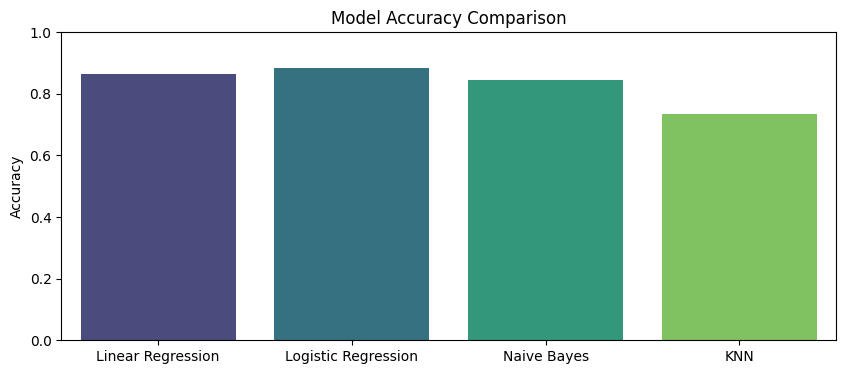

C:\Users\91636\AppData\Local\Temp\ipykernel_20992\4158738207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[res['Model'] for res in results], y=f1_scores, palette="magma")


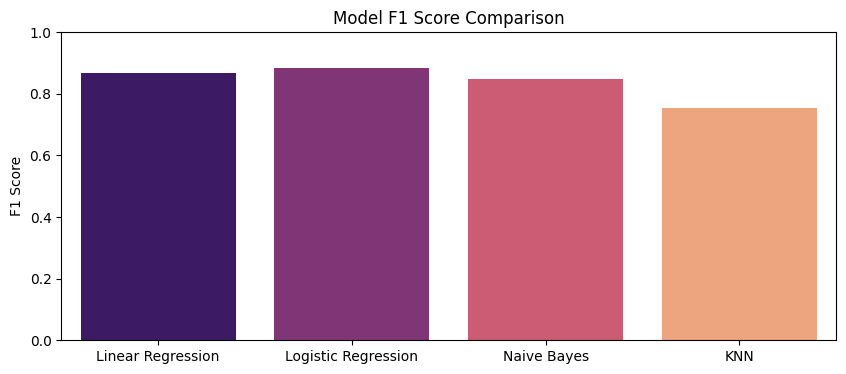

In [8]:
#  Accuracy and F1 Score Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=[res['Model'] for res in results], y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=[res['Model'] for res in results], y=f1_scores, palette="magma")
plt.title("Model F1 Score Comparison")
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.show()


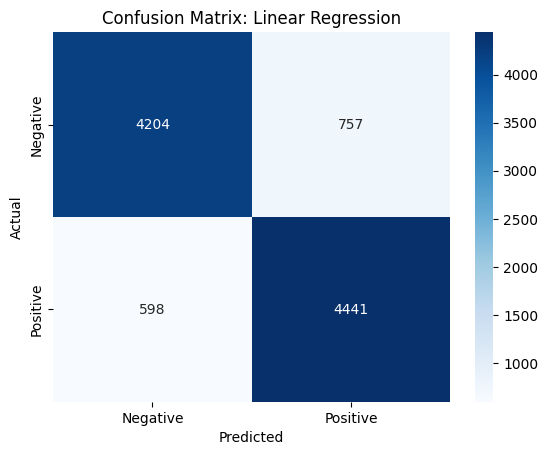

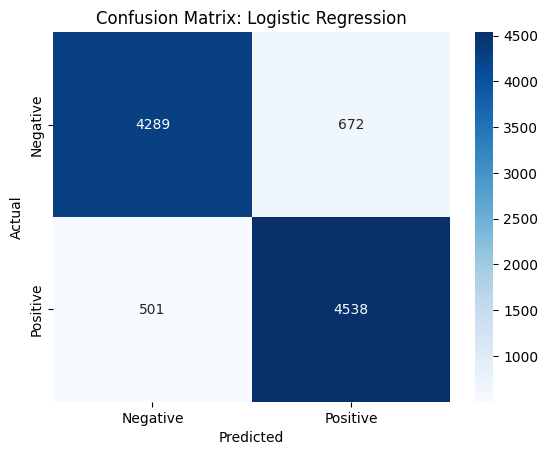

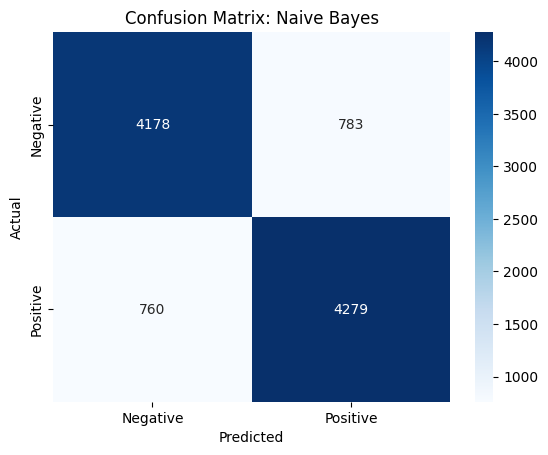

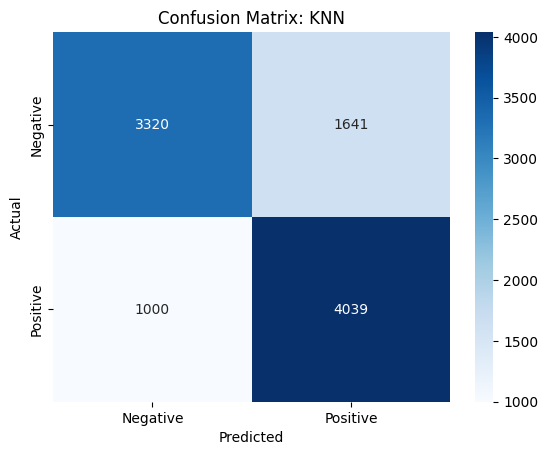

In [9]:
#  Confusion Matrices
for res, model in zip(results, models.values()):
    preds = model.predict(X_test)
    if res['Model'] == "Linear Regression":
        preds = np.where(preds >= 0.5, 1, 0)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {res["Model"]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

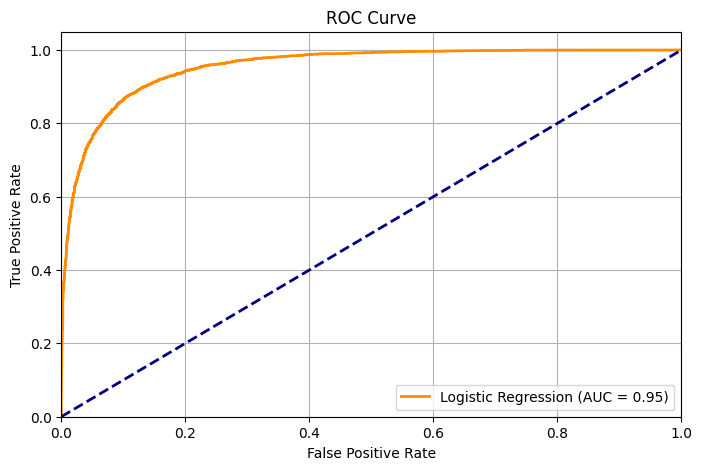

In [10]:
# ROC Curve (Logistic Regression)
y_score = models["Logistic Regression"].predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

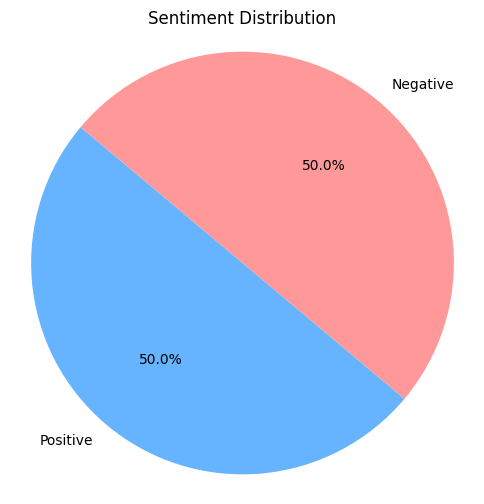

In [11]:
# Sentiment Distribution
labels = ['Positive', 'Negative']
sizes = df['sentiment'].value_counts()
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.axis('equal')
plt.show()


In [12]:
# Predict Sentiment for Custom Reviews
custom_reviews = [
    "This movie was absolutely wonderful and heart-touching!",
    "Terrible plot. I regret watching it.",
    "It was just okay, not too bad but not great either."
]

custom_reviews_cleaned = [clean_text(review) for review in custom_reviews]
custom_vec = vectorizer.transform(custom_reviews_cleaned)
predictions = models["Logistic Regression"].predict(custom_vec)

for review, pred in zip(custom_reviews, predictions):
    label = "Positive" if pred == 1 else "Negative"
    print(f"\nReview: {review}\nPredicted Sentiment: {label}")


Review: This movie was absolutely wonderful and heart-touching!
Predicted Sentiment: Positive

Review: Terrible plot. I regret watching it.
Predicted Sentiment: Negative

Review: It was just okay, not too bad but not great either.
Predicted Sentiment: Negative
